# Выявление причин убытков компании на примере развлекательного приложения ProcrastinatePRO+
## Цель исследования:
1. Выявить причины убытков компании Procrastinate Pro+
2. Найти способ выйти из минуса и достигнуть прибыльности компании

Исследование пройдёт в 4 этапа:
 1. Обзор и подготовка данных.
 2. Нахождение необходимых готовых функций.
 3. Применение функций.
 4. Извлечение выводов из таблиц и графиков

## Описание проекта
Вы являетесь маркетинговым аналитиком развлекательного приложения Procrastinate Pro+. Компания терпит убытки, при этом затраты на рекламу колоссальные. Ваша задача — разобраться в причинах убытков и найти способы получения прибыли.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
   - лог сервера с данными об их посещениях,
   - выгрузка их покупок за этот период,
   - рекламные расходы.
   
Вам предстоит изучить:
   - откуда приходят пользователи и какими устройствами они пользуются,
   - сколько стоит привлечение пользователей из различных рекламных каналов;
   - сколько денег приносит каждый клиент,
   - когда расходы на привлечение клиента окупаются,
   - какие факторы мешают привлечению клиентов.

## Описание данных
### Структура visits_info_short.csv (хранит лог сервера с информацией о посещениях сайта)
   - User Id — уникальный идентификатор пользователя,
   - Region — страна пользователя,
   - Device — тип устройства пользователя,
   - Channel — идентификатор источника перехода,
   - Session Start — дата и время начала сессии,
   - Session End — дата и время окончания сессии.
   
### Структура orders_info_short.csv (информация о покупках)
   - User Id — уникальный идентификатор пользователя,
   - Event Dt — дата и время покупки,
   - Revenue — сумма заказа.
   
### Структура costs_info_short.csv (информация о расходах на рекламу)
   - Channel — идентификатор рекламного источника,
   - Dt — дата проведения рекламной кампании,
   - Costs — расходы на эту кампанию.

## Шаг 1. Загрузка данных и подготовка их к анализу
### 1.1. Положим данные о визитах, заказах и рекламных тратах в переменные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns    
from scipy import stats as st
import plotly.express as px

In [2]:
# Отключаем предупреждения:
warnings.filterwarnings("ignore")

In [3]:
# Просмотры
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')  
visits

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [4]:
# Заказы
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')
orders

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [5]:
# Рекламные издержки
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')  
costs

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

### 1.2. Подготовим данные к анализу. Убедимся, что тип данных во всех колонках соответствует значениям. Проверим отсутствие дубликатов.

Начнем с наименования столбцов.

In [6]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session start  309901 non-null  object
 5   session end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user id   40212 non-null  int64  
 1   event dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Согласно последним трем командам, пропусков в данных нет. А вот названия стоблцов не соответсвуют "этике питона". Переименуем столбцы в датафреймах согласно "хорошему стилю"

In [9]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [10]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [11]:
costs.columns = ['dt', 'channel', 'costs']

Переведем столбцы, содержащие даты, в необходимый тип данных дата-время.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим данные на наличие явных дубликатов

In [15]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликатов нет, тип данных изменен, столбцы переименованы, - значит можно приступать к анализу.

## Шаг 2. Напишем функции для расчета и анализа LTV, ROI, удержания и конверсии

"Сложим" в данный раздел проекта все необходимые функции

In [16]:
# функция образования профиля

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для расчета удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Проведем исследовательский анализ данных
### 3.1. Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

Воспользуемся готовыми функциями. Для начала сформируем профиль

In [24]:
profiles = get_profiles(sessions = visits, orders = orders, ad_costs = costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Найдем минимальную и максимальную даты привелечения пользователей: 

In [25]:
min_date = profiles['first_ts'].min()
min_date

Timestamp('2019-05-01 00:00:41')

In [26]:
max_date = profiles['first_ts'].max()
max_date

Timestamp('2019-10-27 23:59:04')

**Таким образом, самая ранняя дата - 1 мая 2019 года, а самая поздняя - 27 октября 2019 года.**

### 3.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Построим сводную таблицу, отражающую количество пользователей и долю платящих в каждой из стран.

In [27]:
payer = profiles[profiles['payer'] == True] # оставим тех пользователей, кто пользовался платными услугами
#sum_payer = payer[['payer']].sum() # общее количество пользователей, воспользовавшихся платными услугами
sum_payer = profiles.pivot_table(index='region', values='payer', aggfunc='count')
region = payer.pivot_table(index='region', values='payer' , aggfunc='count')
region = region.merge(sum_payer, on='region', how='outer')
region.rename(columns={'payer_x': 'payer', 'payer_y': 'user'}, inplace=True)
#region.columns=('payer', 'user')
region['persentage'] = round(region['payer'] / region['user'] * 100, 2)
region = region.sort_values(by='persentage', ascending=False)
region
#sum_payer

payer    user  persentage
region                                  
United States   6902  100002        6.90
Germany          616   14981        4.11
UK               700   17575        3.98
France           663   17450        3.80

**Таким образом, в выше указанной таблице наглядно представлена конвертация пользователей из бесплатных в платные в разрезе стран. Лидером является США (6,9 % от общего количества пользователей США), а нижнюю строку занимает Франция.**

### 3.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Посмотрим, какими устройствами пользуются пользователи.

In [28]:
print(profiles['device'].sort_values().unique())

['Android' 'Mac' 'PC' 'iPhone']


Построим сводную таблицу, отражающую предпочтения по устройство пользователей и долю платящих по каждому устройству.

In [29]:
#device = payer.pivot_table(index='device', values='payer', aggfunc='count').sort_values(by='payer', ascending=False)
#device['percentage'] = round(device['payer'] / (sum_payer[0])*100, 2)
sum_device = profiles.pivot_table(index='device', values='payer', aggfunc='count')
device = payer.pivot_table(index='device', values='payer', aggfunc='count')
device = device.merge(sum_device, on='device', how='outer')
device.rename(columns={'payer_x': 'payer', 'payer_y': 'user'}, inplace=True)
#region.columns=('payer', 'user')
device['persentage'] = round(device['payer'] / device['user'] * 100, 2)
device = device.sort_values(by='persentage', ascending=False)
device

payer   user  persentage
device                           
Mac       1912  30042        6.36
iPhone    3382  54479        6.21
Android   2050  35032        5.85
PC        1537  30455        5.05

**Таким образом, в выше указанной таблице наглядно представлена конвертация пользователей из бесплатных в платные в разрезе устройств. Лидером по конвертации являются покупатели, использующие макбуки, а самые плохая конвертация у пользователей, зашедших 1 раз с персонального компьютера.**

### 3.4. Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
Напишите промежуточные выводы.

Посмотрим какие рекламные источники и их лидеры по "качественным" пользователям

In [30]:
#channel = payer.pivot_table(index='channel', values='payer' , aggfunc='count').sort_values(by='payer', ascending=False)
#channel['percentage'] = round(channel['payer'] / (sum_payer[0])*100, 2)
sum_channel = profiles.pivot_table(index='channel', values='payer', aggfunc='count')
channel = payer.pivot_table(index='channel', values='payer', aggfunc='count')
channel = channel.merge(sum_channel, on='channel', how='outer')
channel.rename(columns={'payer_x': 'payer', 'payer_y': 'user'}, inplace=True)
#region.columns=('payer', 'user')
channel['persentage'] = round(channel['payer'] / channel['user'] * 100, 2)
channel = channel.sort_values(by='persentage', ascending=False)
channel

payer   user  persentage
channel                                     
FaceBoom             3557  29144       12.20
AdNonSense            440   3880       11.34
lambdaMediaAds        225   2149       10.47
TipTop               1878  19561        9.60
RocketSuperAds        352   4448        7.91
WahooNetBanner        453   8553        5.30
YRabbit               165   4312        3.83
MediaTornado          156   4364        3.57
LeapBob               262   8553        3.06
OppleCreativeMedia    233   8605        2.71
organic              1160  56439        2.06

**В выше указанной таблице наглядно представлена конвертация пользователей из бесплатных в платные в разрезе рекламных каналов. Лидером по конвертации являются покупатели, зашедшие по каналу FaceBoom и AdNonSense, а слабоконвертируемые - из канала organic.**

## Шаг 4. Маркетинг
### 4.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

Посчитаем общую сумму расходов на маркетинг. Это можно сделать двумя способами (заодно и проверить, правильно ли сформировалась таблица профилей):

In [31]:
round(profiles['acquisition_cost'].sum(), 1)

105497.3

In [32]:
round(costs['costs'].sum(), 1)

105497.3

**Т.о., за время с 1.05.19 по 27.10.19 было потрачено 105 497,3 долларов на рекламу.**

Посмотрим, как затраты на рекламу распределены по источникам.

In [33]:
# затраты на рекламу по источникам
channel_promotion = costs.groupby(['channel']).agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()
channel_promotion

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

Присоединим к этой таблице данные по количеству 

In [34]:
# количество плательщиков по каналам
channel_payer = payer.pivot_table(index='channel', values='payer' , aggfunc='count').sort_values(by='payer', ascending=False).reset_index()
channel_promotion = channel_promotion.merge(channel_payer, on=['channel'], how='outer')
channel_promotion

channel     costs  payer
0               TipTop  54751.30   1878
1             FaceBoom  32445.60   3557
2       WahooNetBanner   5151.00    453
3           AdNonSense   3911.25    440
4   OppleCreativeMedia   2151.25    233
5       RocketSuperAds   1833.00    352
6              LeapBob   1797.60    262
7       lambdaMediaAds   1557.60    225
8         MediaTornado    954.48    156
9              YRabbit    944.22    165
10             organic       NaN   1160

In [35]:
channel_promotion['costs'] = channel_promotion['costs'].fillna(0)
channel_promotion['price_one_client'] = channel_promotion['costs'] / channel_promotion['payer'] # цена 1 заплатившего клиента
channel_promotion = channel_promotion.sort_values(by='price_one_client', ascending=False)
channel_promotion

channel     costs  payer  price_one_client
0               TipTop  54751.30   1878         29.154047
2       WahooNetBanner   5151.00    453         11.370861
4   OppleCreativeMedia   2151.25    233          9.232833
1             FaceBoom  32445.60   3557          9.121619
3           AdNonSense   3911.25    440          8.889205
7       lambdaMediaAds   1557.60    225          6.922667
6              LeapBob   1797.60    262          6.861069
8         MediaTornado    954.48    156          6.118462
9              YRabbit    944.22    165          5.722545
5       RocketSuperAds   1833.00    352          5.207386
10             organic      0.00   1160          0.000000

**На основе таблиц, приведенной выше, можно сказать, что лидером по издержкам на рекламу является канал: TipTop, на втором месте: FaceBoom, нижние строки занимают MediaTornado и YRabbit. Но нельзя не обратить внимание на соотношение общих затрат по каналу и количества привлеченных оплативших пользователей. Самыми экономически невыгодными являются каналы: TipTop и WahooNetBanner.**

Сформируем еще одну таблицу и на основе ее построим график. Распределим источники по времени

In [36]:
profiles['month'] = profiles['month'].dt.month # т.к. год один и тот же, то можно его убрать из этого столбца
profiles = profiles.sort_values(by='month') 
#month = {5:'май', 6:'июнь', 7:'июль', 8:'август', 9:'сентябрь', 10:'ноябрь'}
#profiles['month'] = profiles['month'].map(month)

In [37]:
channel_in_time = profiles.groupby(['month', 'channel'])[['acquisition_cost']].sum()
tmp2 = profiles.groupby(['month'])[['acquisition_cost']].sum()
channel_in_time['percentage'] =  round((channel_in_time['acquisition_cost'] / tmp2['acquisition_cost']) * 100, 2)
channel_in_time.reset_index(inplace=True)                                       
channel_in_time
#tmp2

month             channel  acquisition_cost  percentage
0       5          AdNonSense           1169.70       11.72
1       5            FaceBoom           3524.40       35.32
2       5             LeapBob            140.28        1.41
3       5        MediaTornado            238.56        2.39
4       5  OppleCreativeMedia            169.75        1.70
..    ...                 ...               ...         ...
61     10              TipTop          12250.00       58.66
62     10      WahooNetBanner            942.00        4.51
63     10             YRabbit            163.41        0.78
64     10      lambdaMediaAds            213.60        1.02
65     10             organic              0.00        0.00

[66 rows x 4 columns]

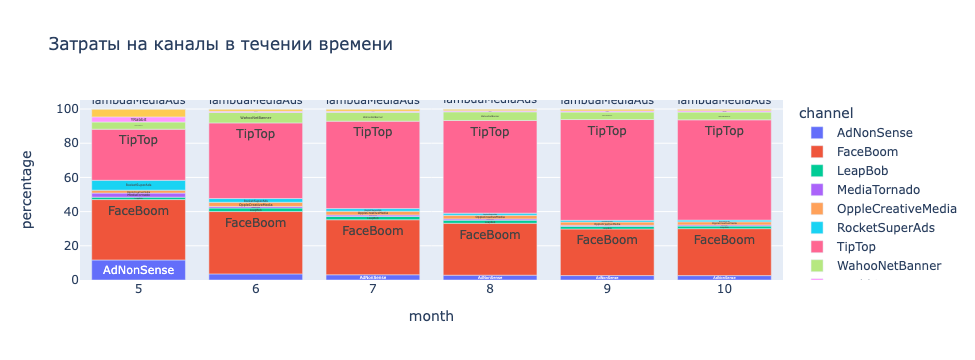

In [38]:
fig = px.bar(channel_in_time, 
             x = 'month', 
             y = 'percentage', 
             color = 'channel', 
             text = 'channel', 
             title = 'Затраты на каналы в течении времени',
             height = 700)
fig.show()

**На графике наглядно представлено распредение затрат на рекламу по каналам по месяцам: в мае лидером был FaceBoom, а начиная с июня - лидерство перехватил TipTop. Вообще, в мае распределение по каналам было более "размытое", т.е. доли других каналов были выше, а, начиная с июня TipTop задавил преимуществом все остальные каналы.**

### 4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей.
Напишем промежуточные выводы.

В п.4.1 уже было просчитано привлечение одного пользователя, правда который совершил оплату. А сейчас подсчитаем привлечение одного любого пользователя.

In [39]:
CAC_by_channel = profiles.groupby(['channel']).agg({'acquisition_cost': ['sum', 'count']})
CAC_by_channel.columns=['cost', 'clients']
CAC_by_channel['price_one_client'] = (CAC_by_channel['cost'] / CAC_by_channel['clients'])
CAC_by_channel = CAC_by_channel.sort_values(by='price_one_client', ascending=False)  #.reset_index()
CAC_by_channel

cost  clients  price_one_client
channel                                                
TipTop              54751.30    19561          2.799003
FaceBoom            32445.60    29144          1.113286
AdNonSense           3911.25     3880          1.008054
lambdaMediaAds       1557.60     2149          0.724802
WahooNetBanner       5151.00     8553          0.602245
RocketSuperAds       1833.00     4448          0.412095
OppleCreativeMedia   2151.25     8605          0.250000
YRabbit               944.22     4312          0.218975
MediaTornado          954.48     4364          0.218717
LeapBob              1797.60     8553          0.210172
organic                 0.00    56439          0.000000

**Как и в случае с пользователями, которые оплатили, лидером по САС является канал: TipTop, а вот на втором месте: FaceBoom, нижние строки занимают LeapBob, MediaTornado и YRabbit.**

Посмотрим как меняется стоимость 1 клиента в разрезе каналов по месяцам

In [40]:
# САС в разрезе каналов по месяцам
CAC_by_channel_in_time = profiles.groupby(['channel', 'month']).agg({'acquisition_cost': ['sum', 'count']})
CAC_by_channel_in_time.columns=['cost', 'clients']
CAC_by_channel_in_time['price_one_client'] = (CAC_by_channel_in_time['cost'] / CAC_by_channel_in_time['clients'])
CAC_by_channel_in_time = CAC_by_channel_in_time.reset_index()
CAC_by_channel_in_time

channel  month     cost  clients  price_one_client
0   AdNonSense      5  1169.70     1138          1.027856
1   AdNonSense      6   538.65      532          1.012500
2   AdNonSense      7   504.00      508          0.992126
3   AdNonSense      8   579.60      582          0.995876
4   AdNonSense      9   581.70      579          1.004663
..         ...    ...      ...      ...               ...
61     organic      6     0.00     7808          0.000000
62     organic      7     0.00     7686          0.000000
63     organic      8     0.00     9041          0.000000
64     organic      9     0.00     9024          0.000000
65     organic     10     0.00     8185          0.000000

[66 rows x 5 columns]

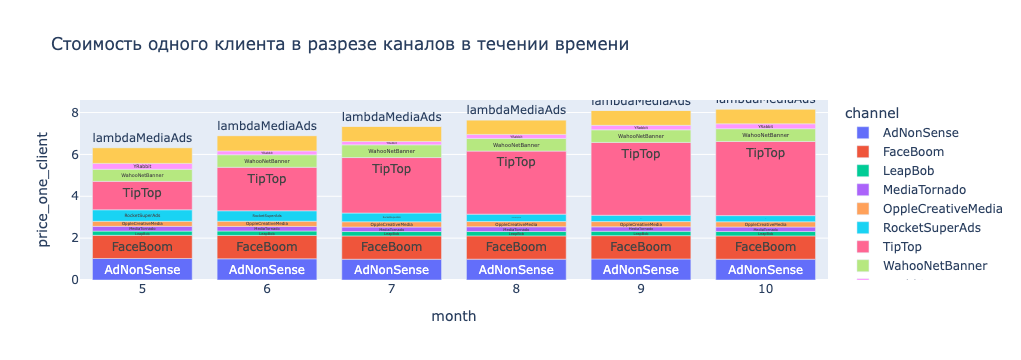

In [41]:
fig = px.bar(CAC_by_channel_in_time, 
             x = 'month', 
             y = 'price_one_client', 
             color = 'channel', 
             text = 'channel', 
             title = 'Стоимость одного клиента в разрезе каналов в течении времени',
             height = 700)
fig.show()

**График показывает измение САС в течении времени. Большинство каналов показывают одну и ту же цену, кроме трех: цена одного растет - канал TipTop, а по двум другим снижается - RocketSuperAds и YRabbit. Возможно это связано с методом оплаты рекламы.**

Рассчитаем средний CAC на одного пользователя для всего проекта:

In [42]:
cac = profiles[profiles['channel'] != 'organic'] # убираем канал органик
cac = round(cac['acquisition_cost'].sum() / cac['acquisition_cost'].count(), 2)
cac

1.13

**Если "откидывать" органических пользователей, то затраты на рекламу на одного пользователя (САС) получаются более одного доллара.**

## Шаг 5. Оценим окупаемость рекламы
Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определим самостоятельно.

### 5.1. Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Посмотрим как обстоят дела с удержанием. Воспользуемся готовой функцией get_retention(). Момент анализа примем - 01.11.2019, а горизонт - 14 (в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения)  и 30 дней (посмотрим что меняется при увеличении горизонта событий).

In [43]:
observation_date = datetime(2019, 11, 1).date()
horizon_days14 = 14
horizon_days30 = 30
observation_date

datetime.date(2019, 11, 1)

Т.к. нам нужно определить окупаемость рекламы, то необходимо убрать органических пользователей

In [44]:
profiles = profiles[profiles['channel'] != 'organic'] # убираем канал органик

Рассчитаем LTV и ROI, применив для этого готовую функцию get_ltv(). И построим графики.

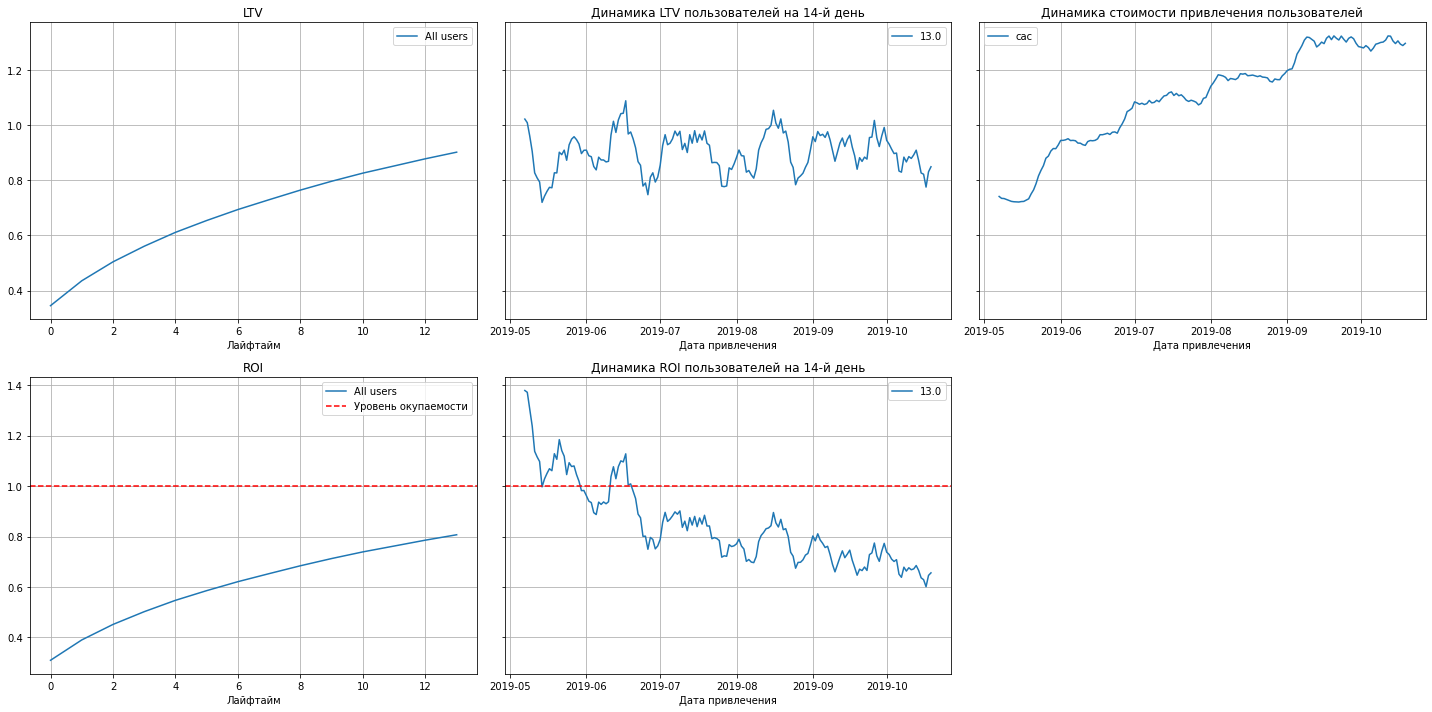

In [45]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=horizon_days14, window=7)

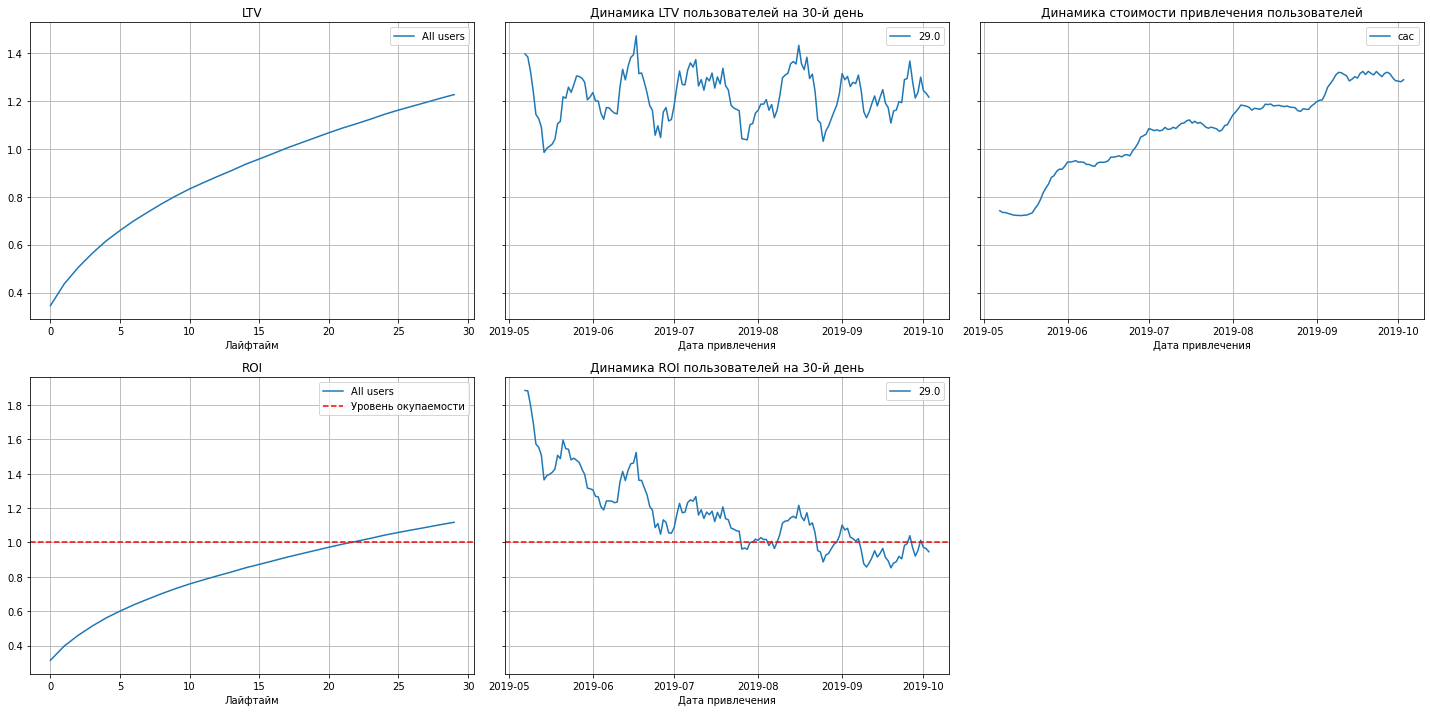

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days30,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=horizon_days30, window=7)

**Если соотнести все аналогичные графики с двумя разными горизонтами событий, то можно сделать следующие выводы:**
   - **LTV растет, сезонность присутствует - октябрь - нелучший месяц для компании, но остальное время - вполне стабильно;** 
   - **очень заметна динамика роста затрат на рекламу. Затраты на рекламу в течении исследуемого периода выросли в 2 раза - с 0,7 до 1,35 долларов на одного клиента;**
  - **показатель ROI не выходит даже в 0 к концу 2ой недели, а в конце месяца - заметна положительная дельта в размере чуть более 10% от затрат на рекламу. В динамике ROI постепенно снижается - при горизонте событий в 14 дней начиная с середины июня, ROI значительно ниже уровня окупаемости;** 
  - **все эти выводы говорят о том, что действительно, компания терпит убытки, при чем убытки растут.**

Посмотрим на эти величины в разрезе следующих показателей:
   - Region — страна пользователя,
   - Device — тип устройства пользователя,
   - Channel — идентификатор источника перехода

## 5.2. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Начнем с источников привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

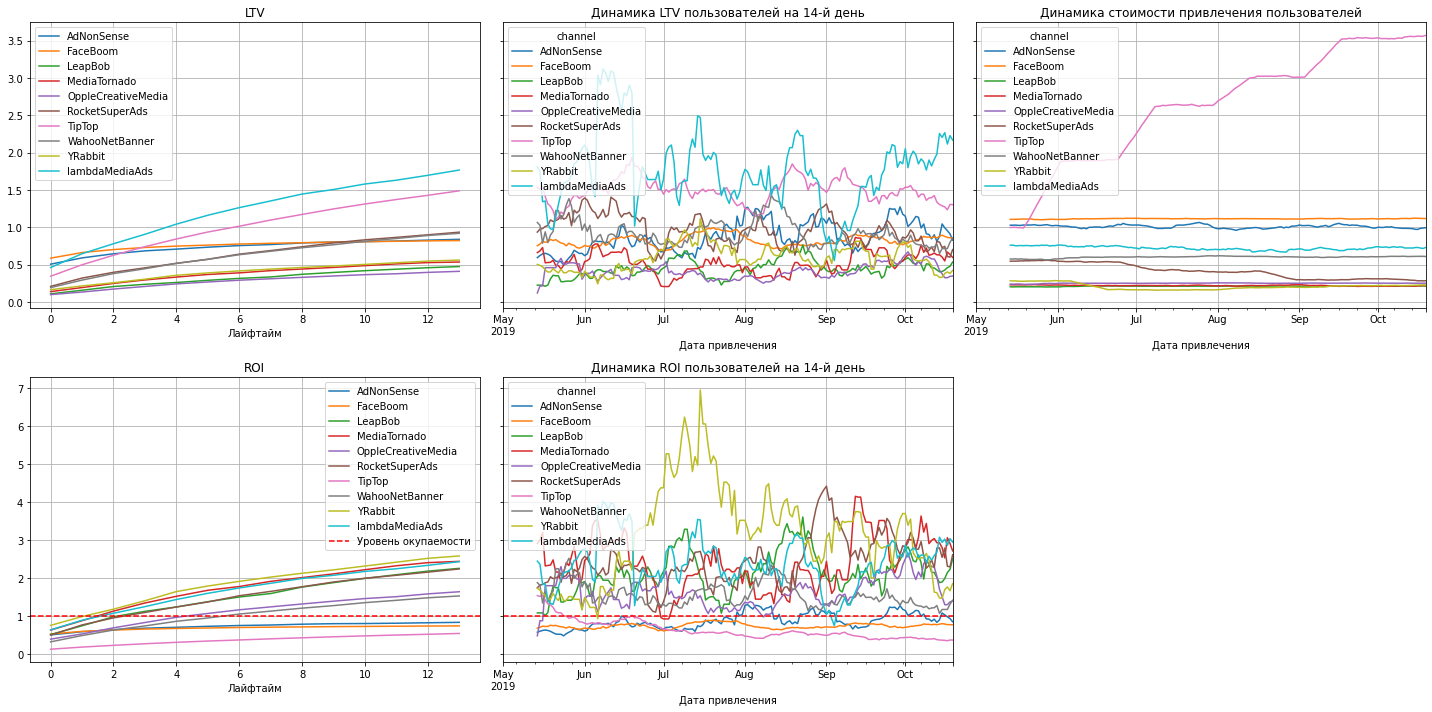

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения при горизонте анализа 14 дней

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

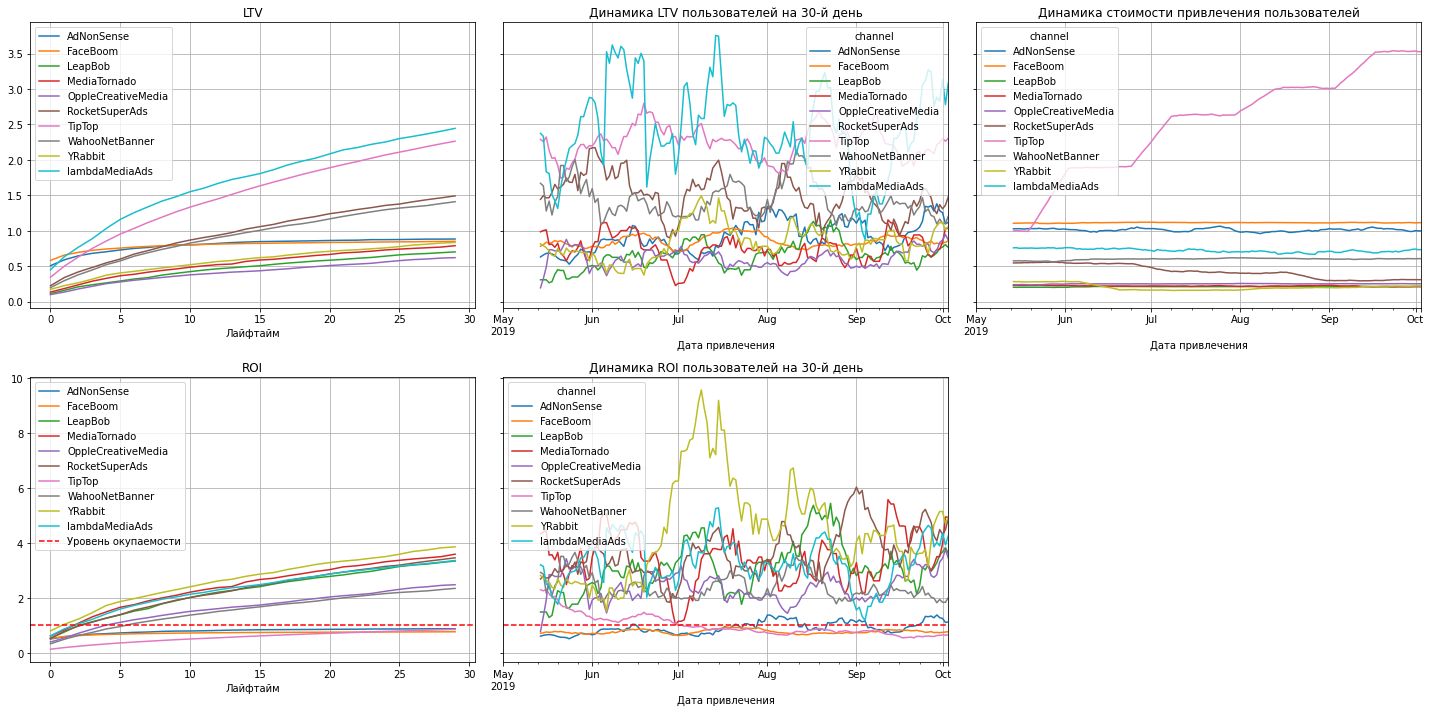

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения при горизонте анализа 30 дней

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days30,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days30, window=14) 

**Если рассматривать аналогичные графики с двумя разными горизонтами событий в разрезе канала, можно сделать следующие выводы:**
   -  **LTV растет, но у двух каналов (AdNonSencse, FaceBoom) рост практически не заметен. Лидерами по LTV  являются LambdaMediaAds, Tip Top;**
   - **Если LTV рассматривать в динамике, - сезонность явно присутствует у всех каналов;**
   - **САС растет только у канала Tip Top, при чем рост стабильный и резкий. Этот рост напоминает рост издержек по рекламе вцелом, без разбивки, возможно это именно тот канал, из-за которого несет компания убытки (проверим это утверждение ниже);**
   - **Затраты на рекламу по остальным каналам более и меннее стабильные, а у канала RocketSuperAds - снижаются;**
   - **ROI показывает: за 2 недели реклама не окупается только по трем каналам: AdNonSencse, FaceBoom и Tip Top. Последний канал находится в наихудшем положении. Реклама по этим каналам не окупается и за месяц, но близка к отметки выхода в уровень окупаемости;**
   - **Если ROI рассматривать в динамике - все каналы, кроме трех выше указанных находятся выше отметки окупаемости. Канал AdNonSencse переодически выходит на окупаемость, вообще у него заметна динамика улучшения - с мая до середины июля канал не окупался, а, начиная со второй половины июля - ROI вышел на окупаемость. FaceBoom стабильно чуть ниже отметки окупаемости, а  Tip Top имееет тендецию снижения - в мае был окупаемым каналом, а потом ROI стал постепенно снижаться и канал неокупает себя на 50%.**   

### 5.3. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Разобъем данные по странам: передадим параметру dimensions столбец region. 

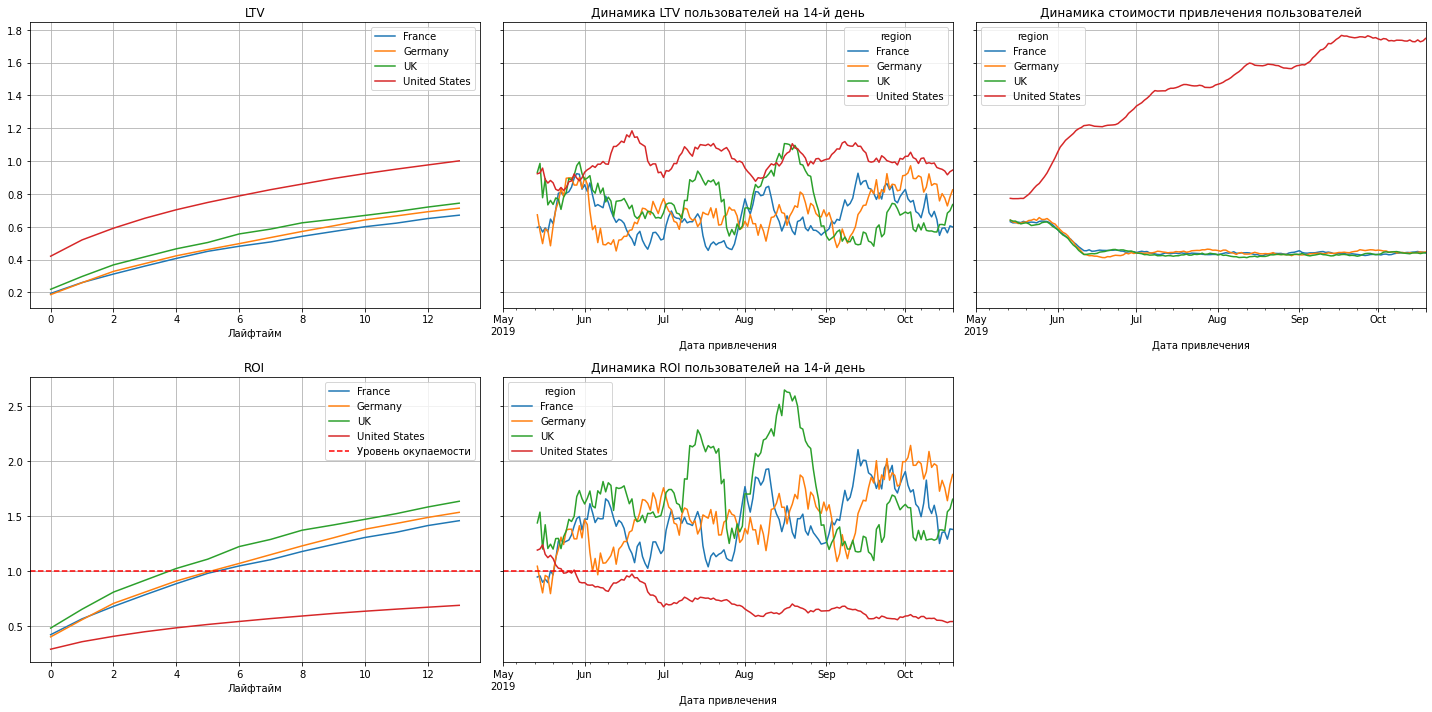

In [49]:
# окупаемость с разбивкой по странам при горизонте анализа 14 дней

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

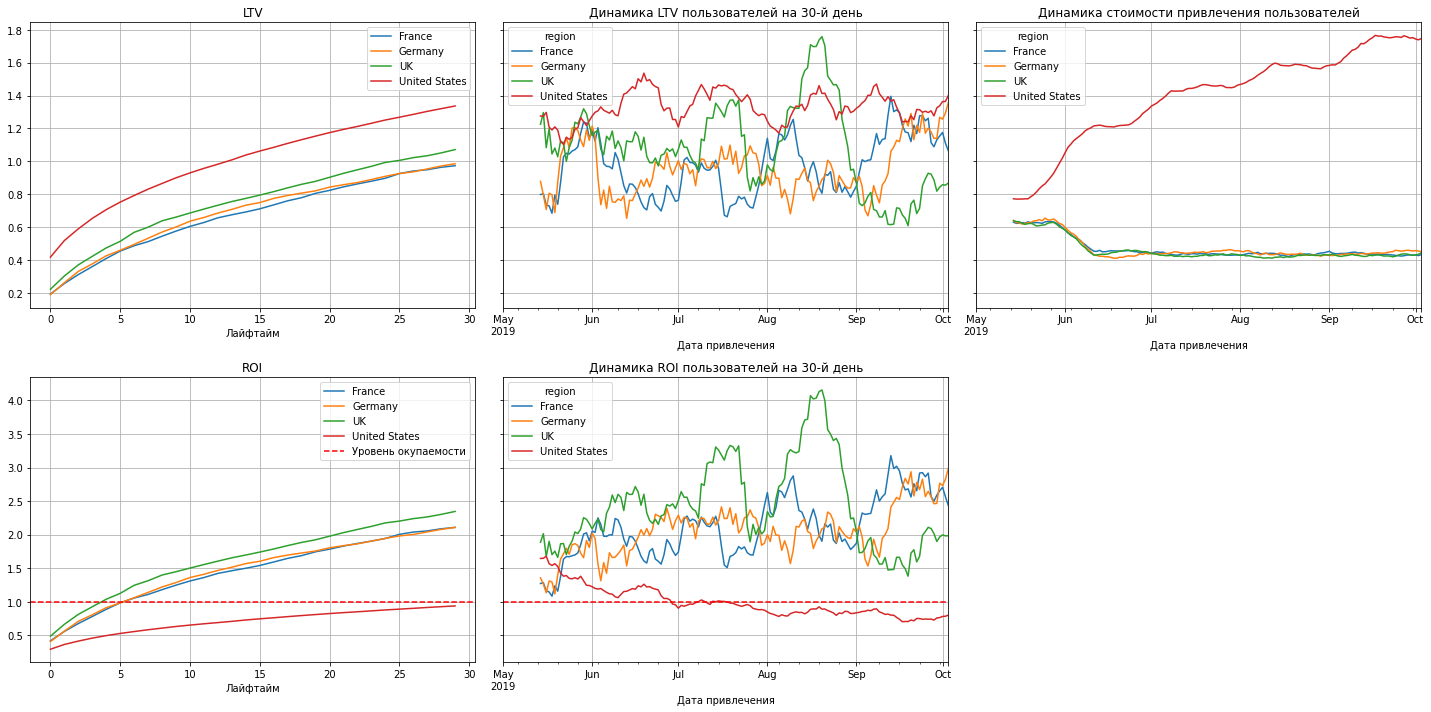

In [50]:
# окупаемость с разбивкой по странам при горизонте анализа 30 дней

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days30,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days30, window=14) 

**Если соотнести все аналогичные графики с разными горизонтами событий в разрезе региона, то можно сделать следующие выводы:**
   - **LTV растет, сезонность присутствует**
       - **в США - май - нелучший месяц, но в остальное время - вполне стабильно,** 
       - **в Великобритании - пик приходится на июль и август, в сентябре наблюдается спад**
       - **в Германии спад наблюдается в августе, в остальное время - вполне стабильно,**
       - **во Франции - пик  в первой половине августа, а также в течении всей осени**
   - **очень заметна динамика роста затрат на рекламу в США, из-за чего компания терпит убытки, график роста очень схож с графиком роста канала TipTop (ниже проверим является ли данный канал американким)**
   - **САС по остальным странам показывает на незначительное снижение в мае-июне;**       
   - **ROI показывает, за 2 недели реклама не окупается только в США, в осталыных странах данный показатель выходит в 0 на 4-6 день**
   - **в США реклама не окупается и на 30 день, но близка к линии окупаемости** 
   - **Если ROI рассматривать в динамике, то все страны, кроме США выходят за линию окупаемости в течении двух недель(за редким небольшим исключением), а спустя месяц - окупаемость достигает коэффициента 1,5-4,0 по сравнению с затратами на рекламу**
   - **из-за того,что САС растет, ROI в динамике по США падает, что говорит о том что компания терпит убытки в данной стране. Вообще, все кривые по США на данных графиках схожи на кривые канала TipTop, эти данные проверим ниже.**

In [51]:
# Посмотрим на канал Tip Top - является ли он наиболее распространенным источником в США и выявим его ореол распространения
profiles[profiles['channel'] == 'TipTop']

user_id            first_ts channel   device         region  \
65376   433811436722 2019-05-05 07:50:52  TipTop   iPhone  United States   
65586   435190451035 2019-05-05 23:40:39  TipTop      Mac  United States   
65486   434533175161 2019-05-25 05:17:44  TipTop      Mac  United States   
64793   430016552014 2019-05-22 14:13:10  TipTop  Android  United States   
64670   429193163503 2019-05-10 23:42:31  TipTop   iPhone  United States   
...              ...                 ...     ...      ...            ...   
131323  876064285060 2019-10-02 21:39:02  TipTop   iPhone  United States   
116079  773576129967 2019-10-19 20:46:42  TipTop  Android  United States   
15998   106347904199 2019-10-21 03:57:17  TipTop      Mac  United States   
131356  876264641823 2019-10-25 00:31:21  TipTop  Android  United States   
131348  876215689186 2019-10-03 12:59:13  TipTop   iPhone  United States   

                dt  month  payer  acquisition_cost  
65376   2019-05-05      5  False          1.012987  
65586   2019-05-05      5  False          1.012987  
65486   2019-05-25      5  False          1.839683  
64793   2019-05-22      5  False          1.900000  
64670   2019-05-10      5  False          0.973684  
...            ...    ...    ...               ...  
131323  2019-10-02     10  False          3.419847  
116079  2019-10-19     10  False          3.606870  
15998   2019-10-21     10  False          3.597222  
131356  2019-10-25     10  False          3.525547  
131348  2019-10-03     10  False          3.539326  

[19561 rows x 9 columns]

In [52]:
profiles[(profiles['channel'] == 'TipTop') & (profiles['region'] == 'United States')]

user_id            first_ts channel   device         region  \
65376   433811436722 2019-05-05 07:50:52  TipTop   iPhone  United States   
65586   435190451035 2019-05-05 23:40:39  TipTop      Mac  United States   
65486   434533175161 2019-05-25 05:17:44  TipTop      Mac  United States   
64793   430016552014 2019-05-22 14:13:10  TipTop  Android  United States   
64670   429193163503 2019-05-10 23:42:31  TipTop   iPhone  United States   
...              ...                 ...     ...      ...            ...   
131323  876064285060 2019-10-02 21:39:02  TipTop   iPhone  United States   
116079  773576129967 2019-10-19 20:46:42  TipTop  Android  United States   
15998   106347904199 2019-10-21 03:57:17  TipTop      Mac  United States   
131356  876264641823 2019-10-25 00:31:21  TipTop  Android  United States   
131348  876215689186 2019-10-03 12:59:13  TipTop   iPhone  United States   

                dt  month  payer  acquisition_cost  
65376   2019-05-05      5  False          1.012987  
65586   2019-05-05      5  False          1.012987  
65486   2019-05-25      5  False          1.839683  
64793   2019-05-22      5  False          1.900000  
64670   2019-05-10      5  False          0.973684  
...            ...    ...    ...               ...  
131323  2019-10-02     10  False          3.419847  
116079  2019-10-19     10  False          3.606870  
15998   2019-10-21     10  False          3.597222  
131356  2019-10-25     10  False          3.525547  
131348  2019-10-03     10  False          3.539326  

[19561 rows x 9 columns]

Предположение оказалось верным - канал TipTop используется только в США. Дальнейшие расчеты приведем ниже, в конце проекта.

А сейчас посмотрим что с окупаемостью при разбивке на виды устройств

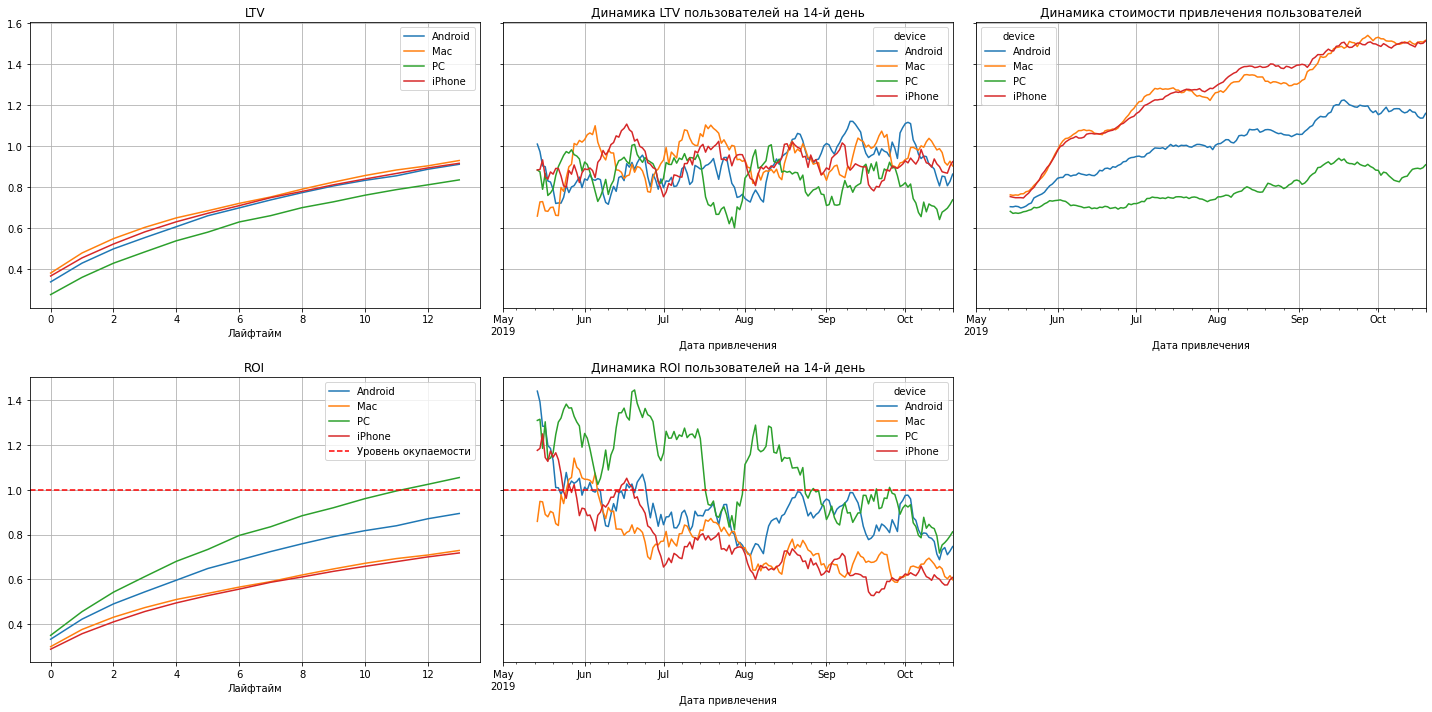

In [53]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=horizon_days14, window=14)

**Данные графики говорят о том, что затраты на рекламу для владельцев устройств фирмы Apple выше, но при этом, окупаемость по данным клиентам гораздо ниже, чем у других. Данное утверждение основано на  графике ROI и САС. Вцелом, по всем устройствам заметен рост по рекламе и, соответственно, спад по окупаемости, видимо это оказывает свое влияние канал TipTop. Самый выгодный канал является РС.**

### 5.4. Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Построим график конверсии с разбивкой по устройствам

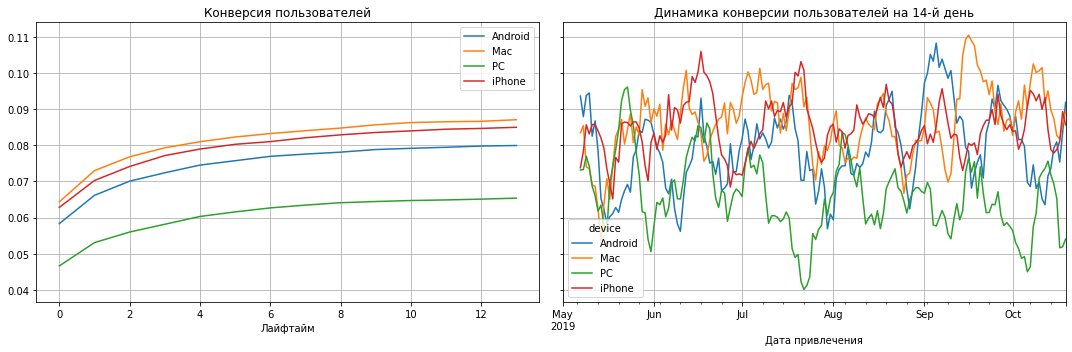

In [54]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon=horizon_days14, window=7)

**Судя по графикам, пользователи Mac и iPhone конвертируются очень хорошо и постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.**

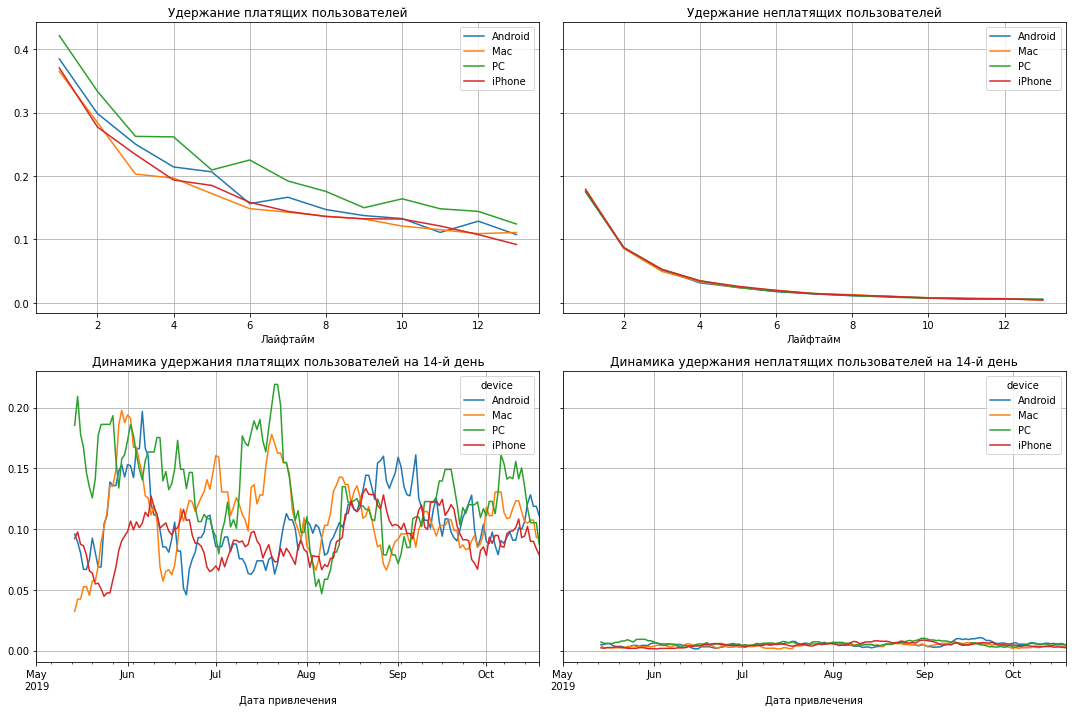

In [55]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                            profiles=profiles,
                                                            sessions=visits,
                                                            observation_date=observation_date,
                                                            horizon_days=horizon_days14,
                                                            dimensions=dimensions,
                                                            ignore_horizon=False
                                                        )

plot_retention(retention=retention_grouped, retention_history=retention_history, horizon=horizon_days14, window=14)

**Что касается удержания, здесь незначительная разница в устройствах. Разница только в динамике платящих пользователей - причем только до начала августа, потом динамика схожа. У неплатящих пользователей график почти сливается в единую линию - говорит о том что удержание очень схоже друг с другом и устройство не влияет на него.**

Построим график конверсии с разбивкой по странам

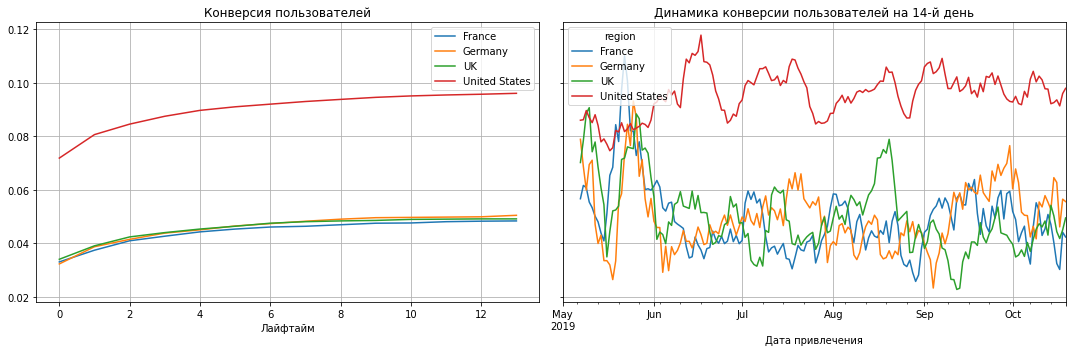

In [56]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon=horizon_days14, window=7)

**Судя по графикам, пользователи США конвертируются очень хорошо и постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.**

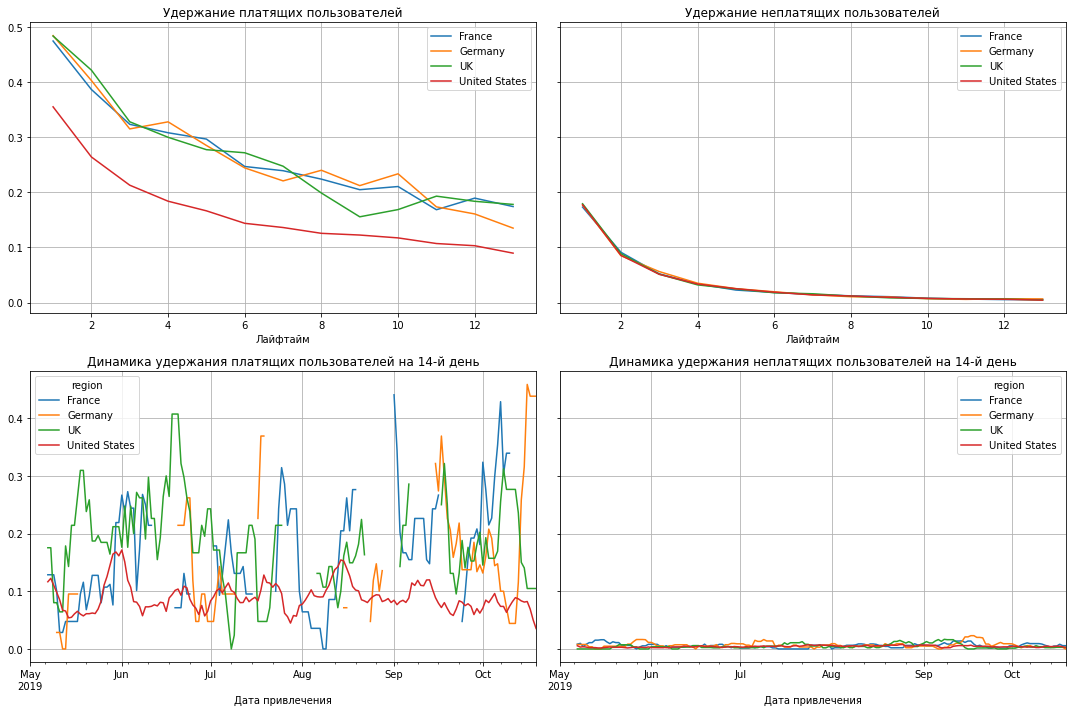

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                            profiles=profiles,
                                                            sessions=visits,
                                                            observation_date=observation_date,
                                                            horizon_days=horizon_days14,
                                                            dimensions=dimensions,
                                                            ignore_horizon=False
                                                        )

plot_retention(retention=retention_grouped, retention_history=retention_history, horizon=horizon_days14)

**Действительно, пользователи США стабильно хуже удерживаются, чем в остальных странах. Для платящих пользователей США удержание 14-го дня находится на нижней границы остальных стран. А в остальных странах - удержание прерывается, особенно это выявлено в Германии, возможно, это связано с тем, что рекламная акция шла не постоянно, а в определенные дни.**

Построим график конверсии с разбивкой по рекламным источникам.

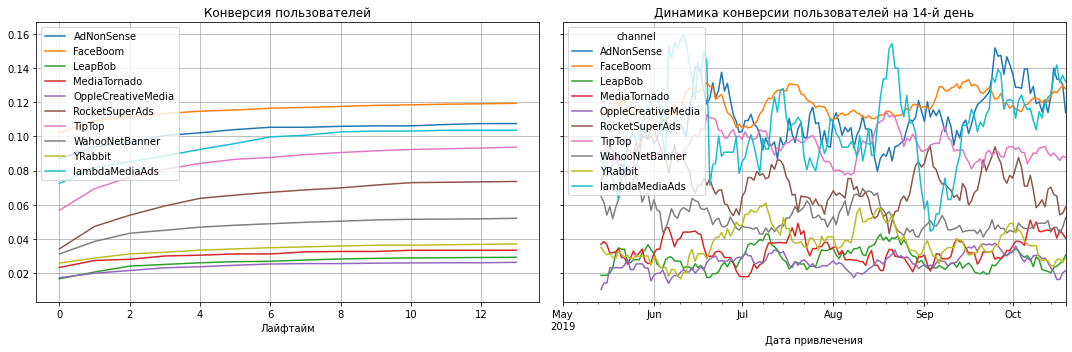

In [58]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon=horizon_days14, window=14)

In [59]:
CAC_by_channel

cost  clients  price_one_client
channel                                                
TipTop              54751.30    19561          2.799003
FaceBoom            32445.60    29144          1.113286
AdNonSense           3911.25     3880          1.008054
lambdaMediaAds       1557.60     2149          0.724802
WahooNetBanner       5151.00     8553          0.602245
RocketSuperAds       1833.00     4448          0.412095
OppleCreativeMedia   2151.25     8605          0.250000
YRabbit               944.22     4312          0.218975
MediaTornado          954.48     4364          0.218717
LeapBob              1797.60     8553          0.210172
organic                 0.00    56439          0.000000

**Судя по графикам, наилучашая конверсия у канала FaceBoom и AdNonSense. Очень низкие конверсии у 4 каналов: OppleCreativeMedia,  LeapBob, MediaTornado, YRabbit. Если посмотреть на цену 1 клиента в этих 4 каналов, то становится понятно почему они самые дешевые - из-за низкой конверсии. А вот TipTop оказался мало того, что дорогим, так еще среднеконвертируемым. Посмотрим, что у нас с удержанием.**

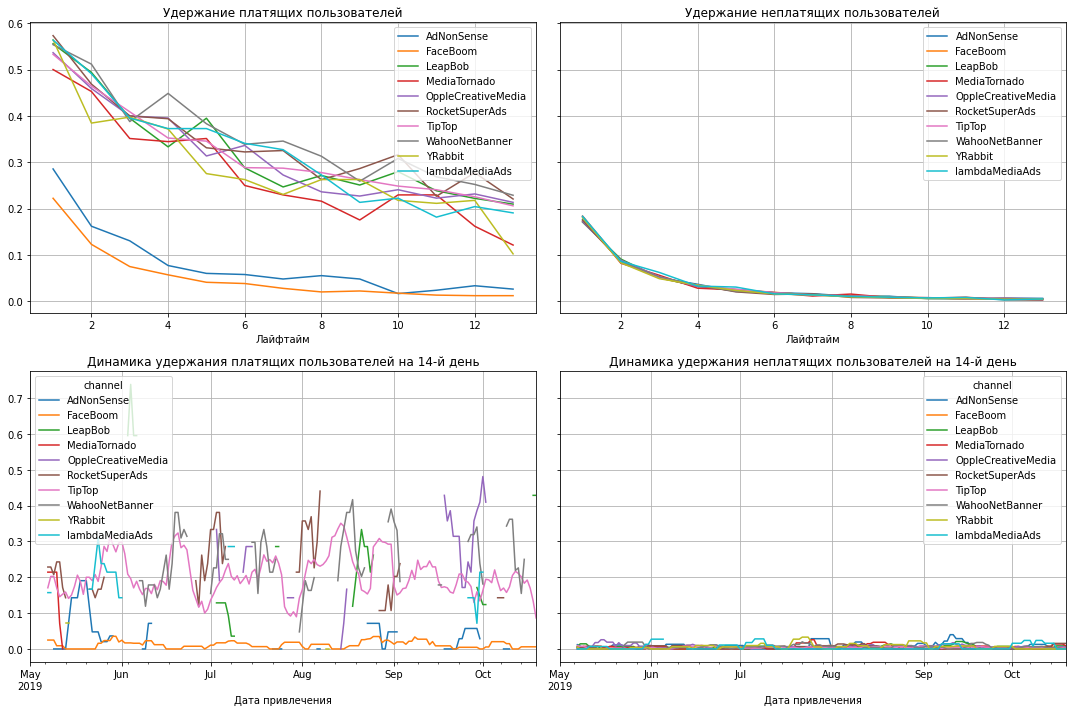

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                            profiles=profiles,
                                                            sessions=visits,
                                                            observation_date=observation_date,
                                                            horizon_days=horizon_days14,
                                                            dimensions=dimensions,
                                                            ignore_horizon=False
                                                        )

plot_retention(retention=retention_grouped, retention_history=retention_history, horizon=horizon_days14)

**Хуже всего удерживаются клиенты из каналов: канала FaceBoom и AdNonSense, причем у последнего канала очень много разрывов в динамике, да и вообще у всех каналов, кроме двух наблюдаются разрывы. Постоянные только - FaceBoom и TipTop.**

## Шаг 6. Напишем выводы
### 6.1. Выделим причины неэффективности привлечения пользователей.

**Исходя из всех выше указанных расчетов, графиков, основные убытки компания терпит из-за явного предпочтения канала TipTop. Это заметно на многих графиках и в таблице сас. Львиная доля затрат на рекламу приходится именно по этому каналу, но как показала конверсия и LTV, это не самый удачный выбор для основного рекламного канала.**

### 6.2. Сформулируем рекомендации для отдела маркетинга.

Т.к. TipTop - канал в США, возможно у компании вектор направлен на эту страну, поэтому, проверим есть ли в США еще каналы кроме органического.

In [61]:
profiles[(profiles['region'] == 'United States')]

user_id            first_ts       channel   device  \
0             599326 2019-05-07 20:58:57      FaceBoom      Mac   
65276   433117509359 2019-05-03 04:12:35      FaceBoom   iPhone   
65277   433127979771 2019-05-11 20:29:23      FaceBoom   iPhone   
65344   433644076861 2019-05-10 01:38:16      FaceBoom   iPhone   
65364   433733597905 2019-05-09 13:29:08       YRabbit  Android   
...              ...                 ...           ...      ...   
131348  876215689186 2019-10-03 12:59:13        TipTop   iPhone   
61184   406114021776 2019-10-12 14:20:34  MediaTornado  Android   
131342  876197851200 2019-10-25 05:35:49      FaceBoom   iPhone   
61191   406152751918 2019-10-05 19:59:26      FaceBoom   iPhone   
61198   406197983883 2019-10-09 06:51:12      FaceBoom   iPhone   

               region          dt  month  payer  acquisition_cost  
0       United States  2019-05-07      5   True          1.088172  
65276   United States  2019-05-03      5  False          1.128947  
65277   United States  2019-05-11      5  False          1.128205  
65344   United States  2019-05-10      5  False          1.066327  
65364   United States  2019-05-09      5  False          0.300000  
...               ...         ...    ...    ...               ...  
131348  United States  2019-10-03     10  False          3.539326  
61184   United States  2019-10-12     10  False          0.240000  
131342  United States  2019-10-25     10   True          1.104762  
61191   United States  2019-10-05     10  False          1.128821  
61198   United States  2019-10-09     10  False          1.151333  

[61829 rows x 9 columns]

Да, каналы другие есть. Посмотрим сколько каналов и валовые затраты на их услуги

In [62]:
usa = profiles[(profiles['region'] == 'United States')]
usa = usa.groupby(['channel']).agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)
usa

acquisition_cost
channel                         
TipTop                  54751.30
FaceBoom                32445.60
RocketSuperAds           1833.00
MediaTornado              954.48
YRabbit                   944.22

Да, канал TipTop забирает бОльшую часть бюджета на рекламу в США, а итог - плачевный. А еще мы видим в "антилидерах" канал FaceBoom, который также неокупался за месяц, но он показал лучшую конверсию из всех каналов. Поэтому, исключим только один канал (TipTop) из датафрейма и посмотрим что будет с графиками.

In [63]:
profiles_new = profiles[profiles['channel'] != 'TipTop']
#profiles_new[(profiles_new['region'] == 'United States')]

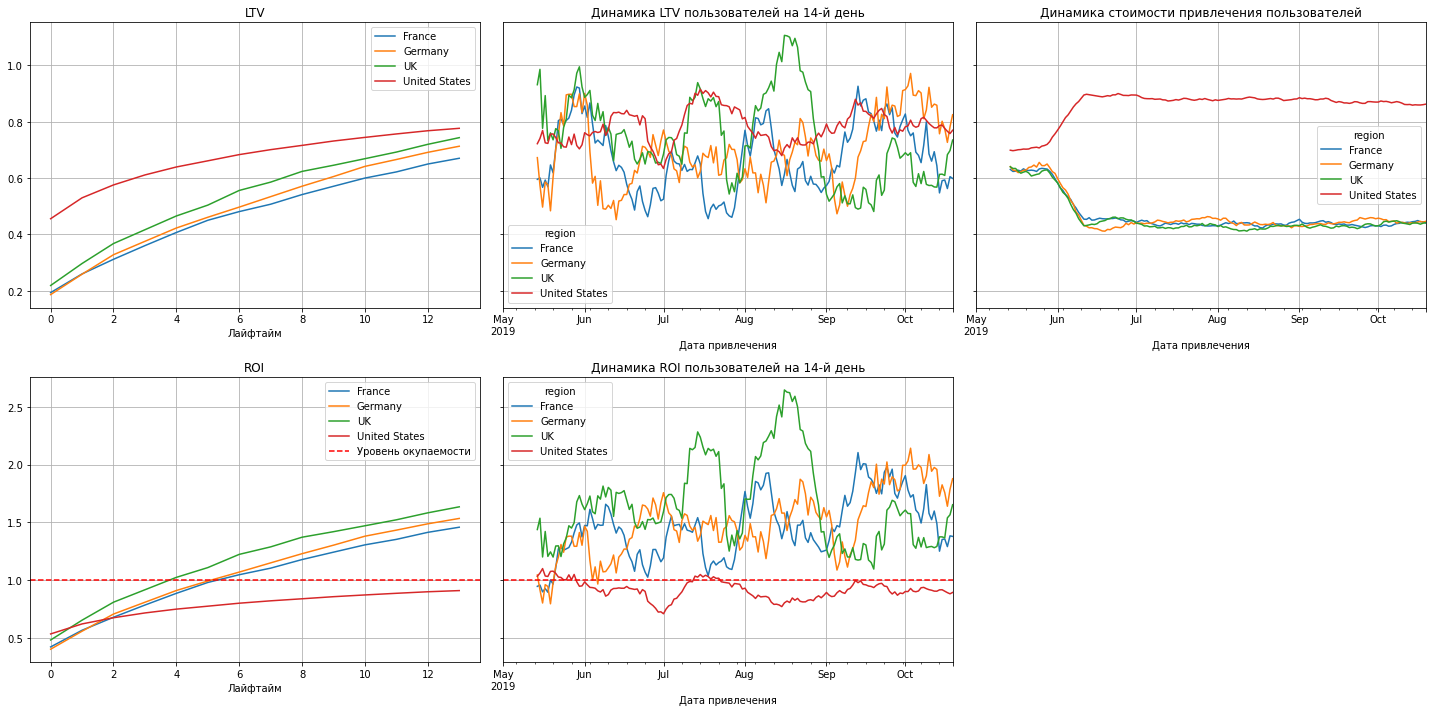

In [64]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

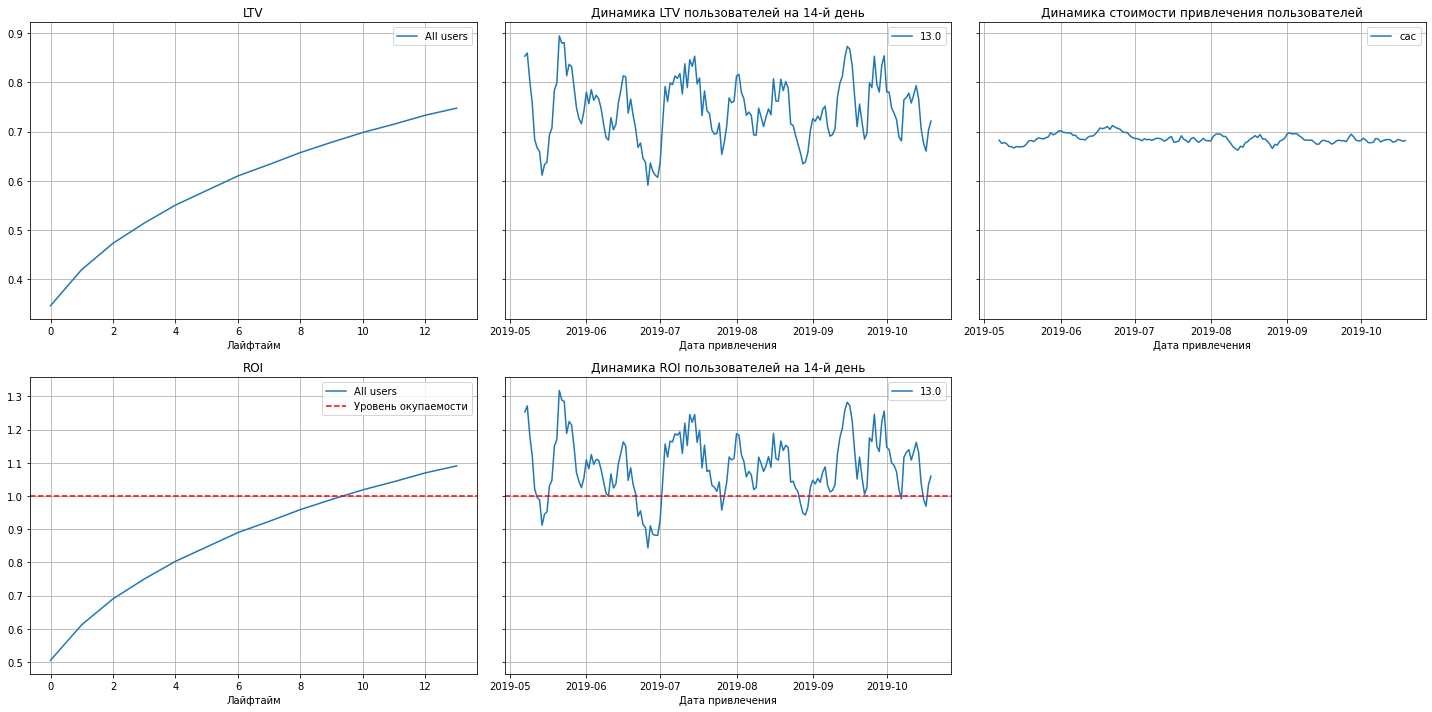

In [65]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=horizon_days14, window=7)

Графики, конечно изменились, но за 14 дней США так и не достигла окупаемости рекламы, хотя и видно, что затраты на рекламу снизились и ROI в динамике выравнялся - нет падения в течении времени. Попробуем скинуть еще один "балласт" - канал FaceBoom

In [66]:
profiles_new = profiles[(profiles['channel'] != 'TipTop') & (profiles['channel'] != 'FaceBoom')]

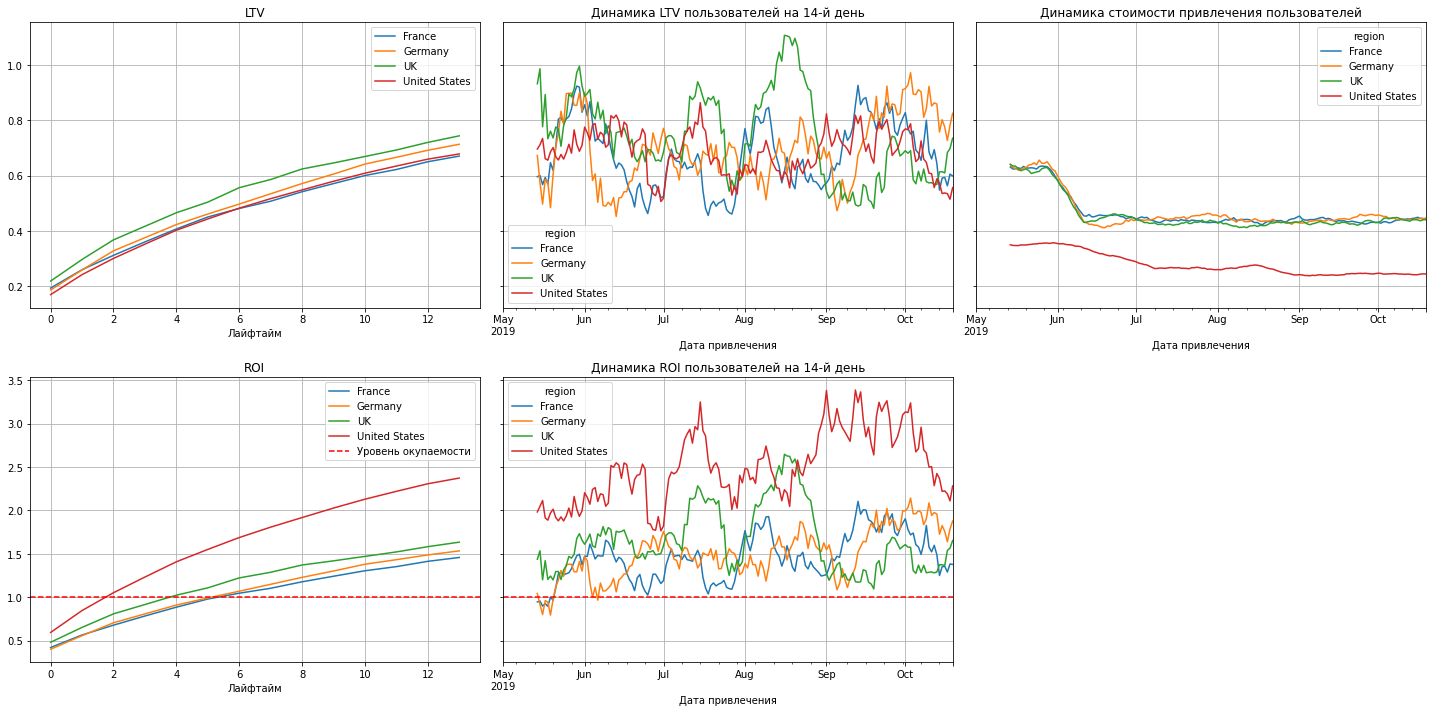

In [67]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

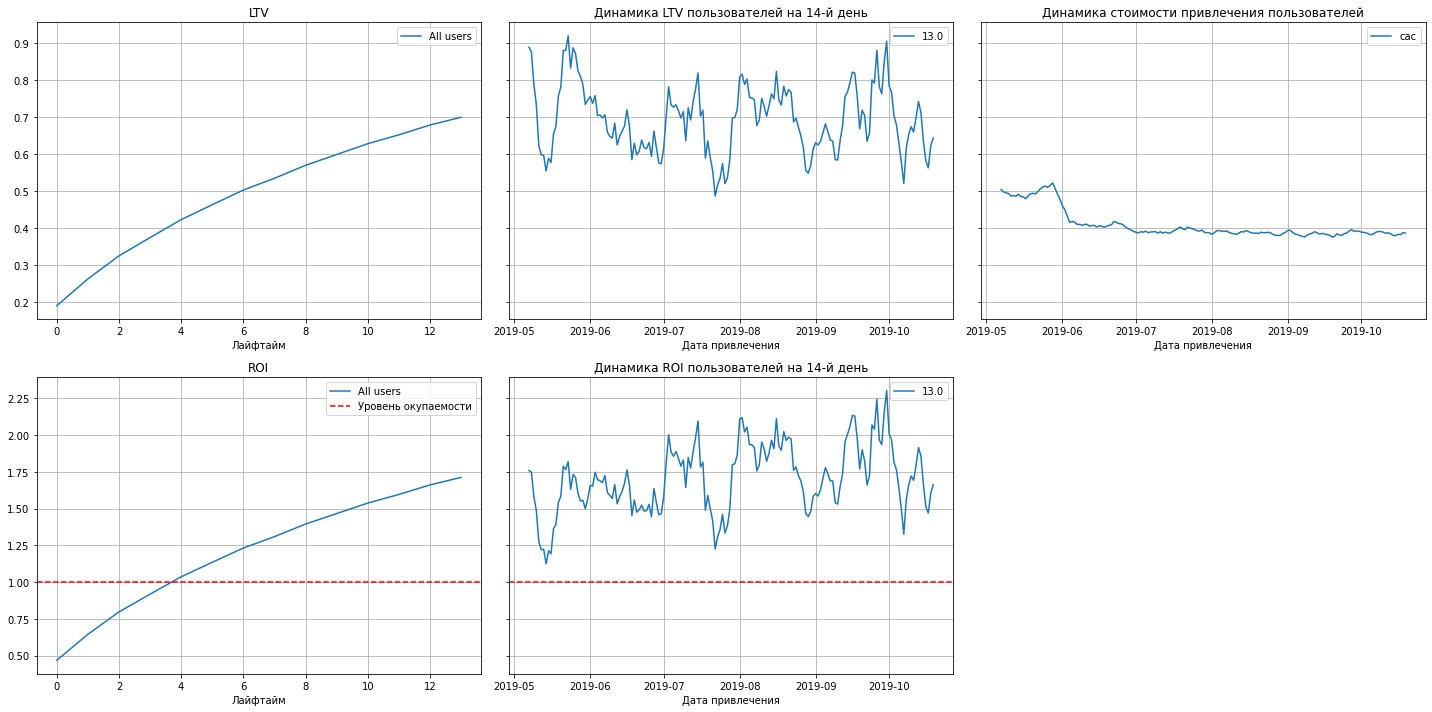

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=horizon_days14, window=7)

**Как же изменились все графики! США стал лидером по рентабельности рекламы (затраты упали, вырос ROI). Затраты на рекламу значительно снизились как в США, так и по всем странам вцелом. ROI по США вышел на самоокупаемость на 2 день, а вцелом по странам - на 4 день. Это очень хороший показатель.**

**Таким образом, если отказаться от двух самых дорогих, и как оказалось невыгодных каналов TipTop и FaceBoom, то можно уйти в хороший "плюс". Для развития компании, рекомендуется канал lambdaMediaAds, который показал хороший LTV, высокий ROI, низкий CAC, и достаточно высокую конверсию.**

Чтобы посмотереть конкретные каналы, вызовем переменные, которые содержат информацию по данным каналам. Где необходимо, сделаем срезы. Везде срезы делать нельзя, т.к. каналы лучше сравнивать с другими каналами.

In [69]:
usa

acquisition_cost
channel                         
TipTop                  54751.30
FaceBoom                32445.60
RocketSuperAds           1833.00
MediaTornado              954.48
YRabbit                   944.22

Каналы Yrabbit и RocketSuperAds - это каналы США. После удаления TipTop и FaceBoom, графики США ведут себя наилучшим образом - самые низкие затраты по рекламе и самая высокая окупаемость рекламы (график приведен ниже), а это значит что данные каналы - уже неплохой выбор.

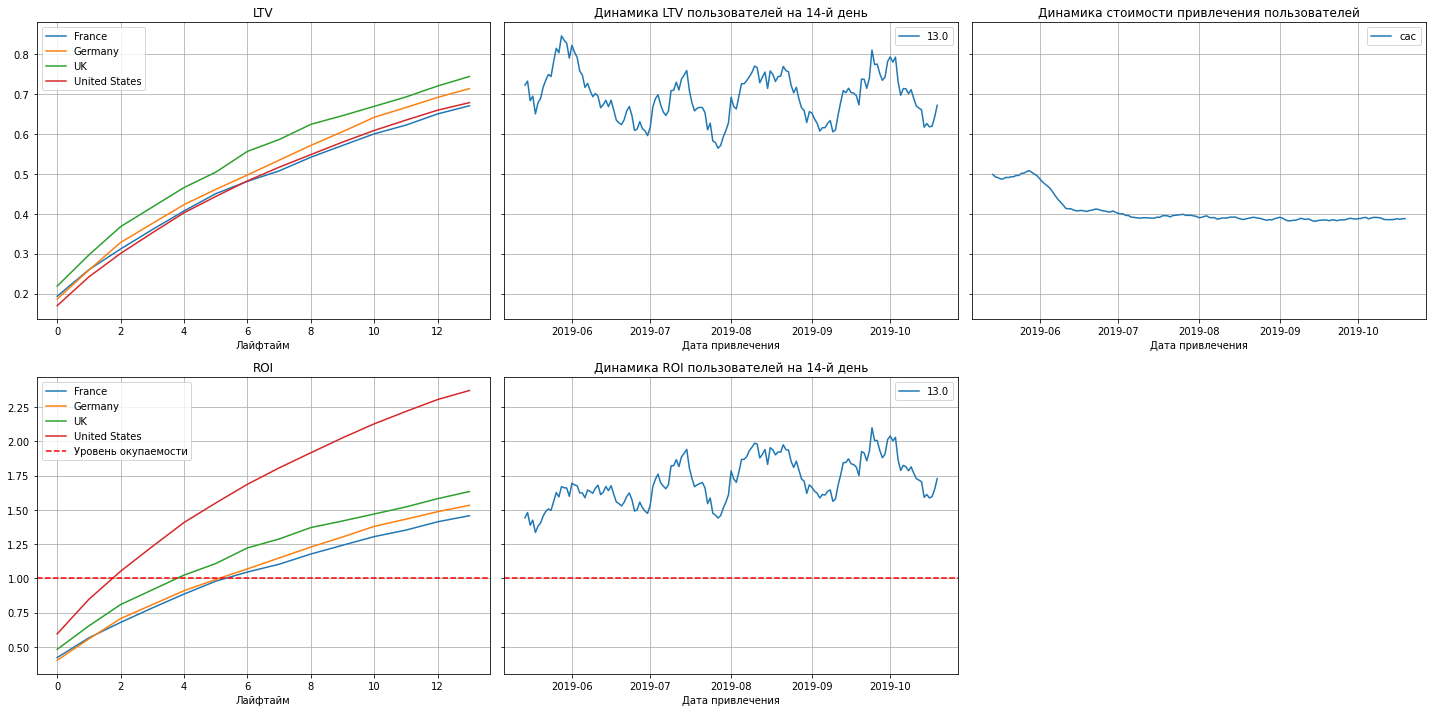

In [70]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

Еще раз посмотрим окупаемость по каналам

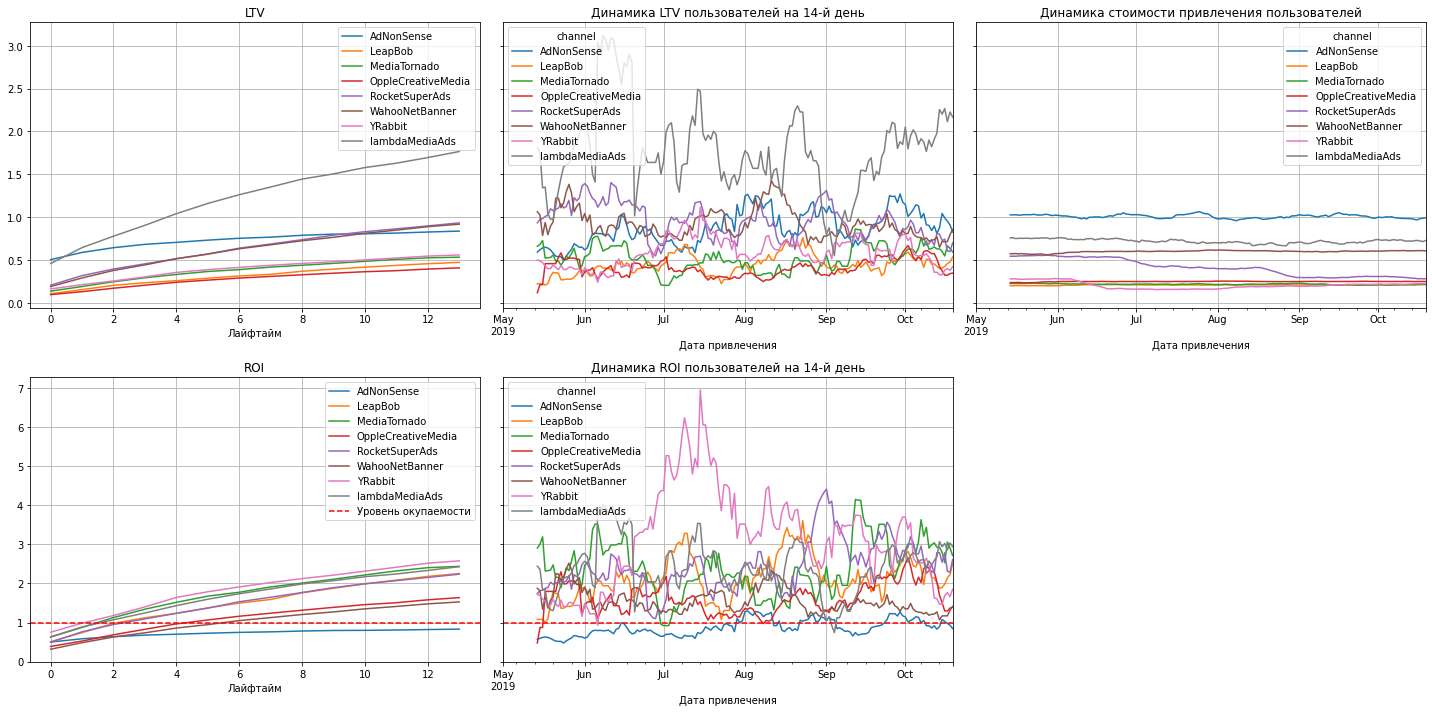

In [71]:
# смотрим окупаемость с разбивкой по источникам привлечения при горизонте анализа 14 дней

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon=horizon_days14, window=14) 

In [72]:
CAC_by_channel # Цена привлечения одного любого пользователя

cost  clients  price_one_client
channel                                                
TipTop              54751.30    19561          2.799003
FaceBoom            32445.60    29144          1.113286
AdNonSense           3911.25     3880          1.008054
lambdaMediaAds       1557.60     2149          0.724802
WahooNetBanner       5151.00     8553          0.602245
RocketSuperAds       1833.00     4448          0.412095
OppleCreativeMedia   2151.25     8605          0.250000
YRabbit               944.22     4312          0.218975
MediaTornado          954.48     4364          0.218717
LeapBob              1797.60     8553          0.210172
organic                 0.00    56439          0.000000

LTV, в том числе и в динамике у RocketSuperAds лучше, чем у Yrabbit, вообще LTV RocketSuperAds стоит на втором месте после предложенного lambdaMediaAds; затраты на рекламу ниже у Yrabbit, чем у RocketSuperAds, но у второго канала они снижаются с течением времени, а среди всех остальных каналов, расходы на рекламу составляют ниже среднего; что касается ROI: Yrabbit в лидерах по этому показателю, хотя RocketSuperAds не намного ниже.

In [73]:
channel # конвертация пользователей из бесплатных в платные

payer   user  persentage
channel                                     
FaceBoom             3557  29144       12.20
AdNonSense            440   3880       11.34
lambdaMediaAds        225   2149       10.47
TipTop               1878  19561        9.60
RocketSuperAds        352   4448        7.91
WahooNetBanner        453   8553        5.30
YRabbit               165   4312        3.83
MediaTornado          156   4364        3.57
LeapBob               262   8553        3.06
OppleCreativeMedia    233   8605        2.71
organic              1160  56439        2.06

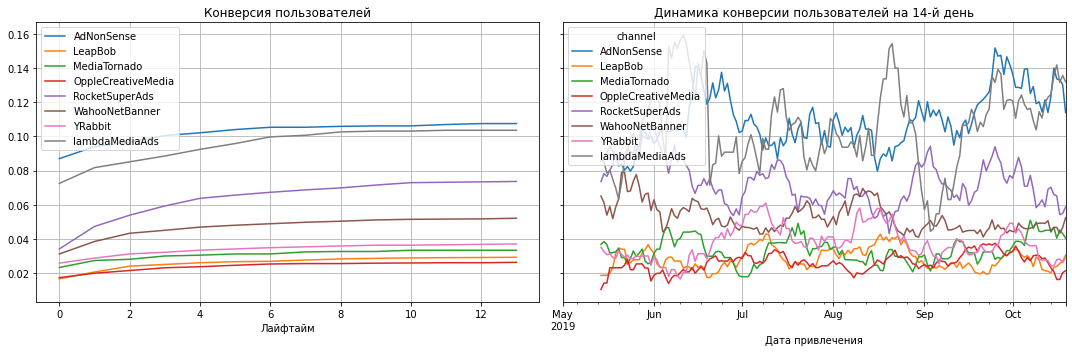

In [74]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles_new,                                                       
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days14,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon=horizon_days14, window=14)

Конверсия пользователей по предложенному каналу RocketSuperAds является средней среди всех каналов, и она выше в 2 раза, чем у YRabbit, который находится 4м снизу среди списка конверсии.

In [75]:
channel_promotion # Цена привлечения одного пользователя, который оплатил

channel     costs  payer  price_one_client
0               TipTop  54751.30   1878         29.154047
2       WahooNetBanner   5151.00    453         11.370861
4   OppleCreativeMedia   2151.25    233          9.232833
1             FaceBoom  32445.60   3557          9.121619
3           AdNonSense   3911.25    440          8.889205
7       lambdaMediaAds   1557.60    225          6.922667
6              LeapBob   1797.60    262          6.861069
8         MediaTornado    954.48    156          6.118462
9              YRabbit    944.22    165          5.722545
5       RocketSuperAds   1833.00    352          5.207386
10             organic      0.00   1160          0.000000

Стоимость одного "ценного" клиента по предложенным каналам является самой низкой среди всех каналов, а это большое преимущество среди других.

**Если говорить вцелом про каналы Yrabbit и RocketSuperAds в плане их рекомендации для использования как одних из основных каналов привлечения клиентов, кроме указанного выше канала - lambdaMediaAds, то можно сказать, что эти каналы вполне подойдут для развития бизнеса в США, т.к. lambdaMediaAds - это неамериканский канал привлечения пользователей. Если сравнивать Yrabbit и RocketSuperAds, то можно найти у каждого канала свои плюсы и минусы. Основным плюсом этих каналов яляется низкая стоимость, которая положительно влияет на окупаемость рекламы. RocketSuperAds является более дорогим каналом, чем Yrabbit, но при этом, показывает выше LTV и конверсию в 2 раза. Думаю, можно использовать оба этих канала, что охватить бОльшую аудиторию пользователей с возможностью получить наибольшую прибыль для компании.** 